<a href="https://colab.research.google.com/github/anandaru/NIT/blob/main/HistogramAndTransformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spatial operations are performed directly on the pixels of an image. We classify spatial operations into three broad categories:
* (1) single-pixel operations,
* (2) neighborhood operations, and
* (3) geometric spatial transformations.

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Define the path to the image
image_path = '/content/drive/MyDrive/FELV-cat.jpg'

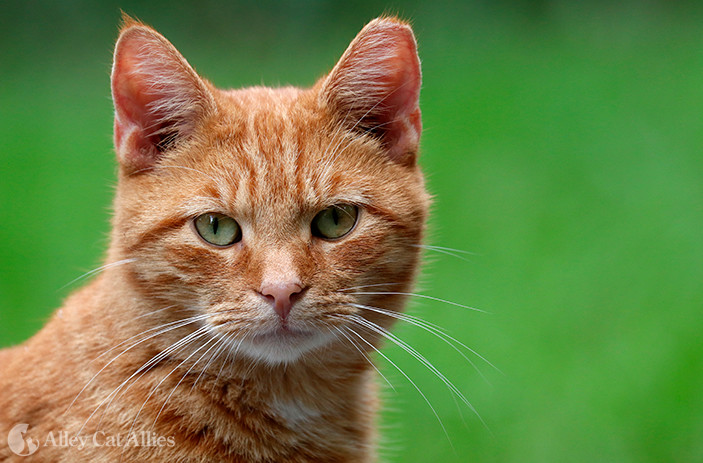

In [8]:

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
cv2_imshow(image)

In [9]:
# Get the dimensions of the image
height, width, channels = image.shape

# Print the size of the image
print("Image width:", width)
print("Image height:", height)
print("Number of channels:", channels)

Image width: 703
Image height: 463
Number of channels: 3


# Convert to Grayscale

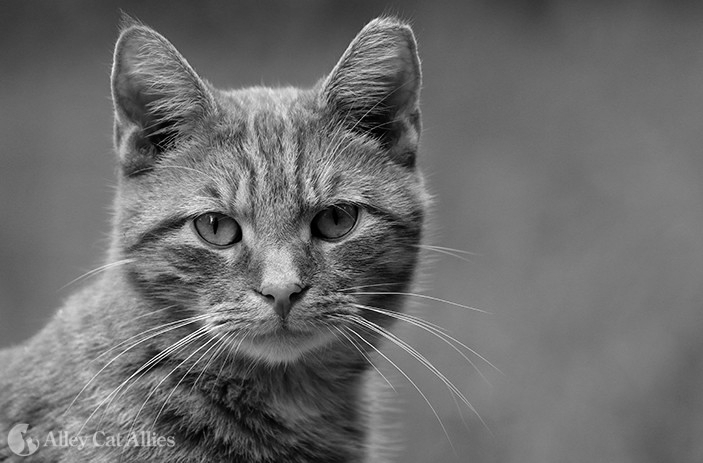

In [10]:
import numpy as np
# Convert to grayscale manually (weighted sum of R, G, B channels)
gray_image = np.dot(image[:, :, :], [0.3, 0.6, 0.1]).astype(np.uint8)
cv2_imshow(gray_image)

# Single-Pixel Operations - complement

The simplest operation we perform on a digital image is to alter the intensity of its pixels individually using a transformation function, T, of the form:
s = T(z) where z is the intensity of a pixel in the original image and s is the (mapped) inten- sity of the corresponding pixel in the processed image.

In [11]:
negative = 255-gray_image

array([[199, 199, 200, ..., 186, 184, 182],
       [203, 203, 203, ..., 184, 184, 183],
       [202, 201, 201, ..., 183, 183, 182],
       ...,
       [207, 212, 210, ..., 150, 152, 151],
       [185, 185, 179, ..., 152, 152, 152],
       [161, 158, 151, ..., 154, 153, 153]], dtype=uint8)
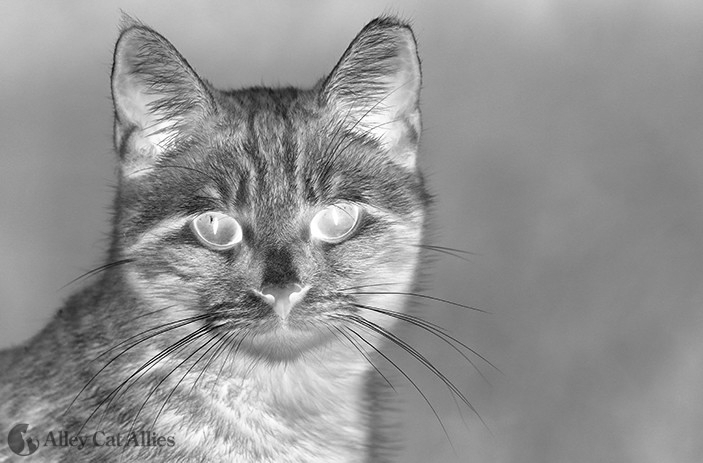

In [12]:
negative

# Neighborhood Operations - Local averaging

Let Sxy denote the set of coordinates of a neighborhood centered on an arbitrary point (x, y) in an image, f. Neighborhood processing generates a corresponding pixel at the same coordinates in an output (processed) image, g, such that the value of that pixel is determined by a specified operation on the neighborhood of pixels in the input image with coordinates in the set Sxy

Intutition

In [17]:
import numpy as np

# Define two matrices
matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6]])

matrix2 = np.array([[7, 8, 9],
                    [10, 11, 12]])

# Element-wise multiplication
elementwise_mult = matrix1 * matrix2

# Sum of two matrices
weighted_sum_of_matrices = np.sum(elementwise_mult)

# Display the results
print("Element-wise multiplication:")
print(elementwise_mult)

print("\nweighted_sum_of_matrices:")
print(weighted_sum_of_matrices)


Element-wise multiplication:
[[ 7 16 27]
 [40 55 72]]

weighted_sum_of_matrices:
217


Approach - 1

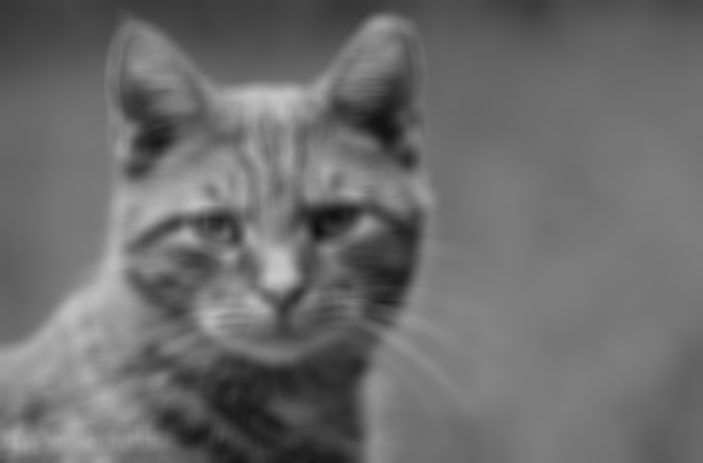

In [18]:
  M = 15
  N = 15

  kernel = np.ones((M, N), dtype=np.int32) / (M * N)

  # Perform convolution using the filter2D function
  smoothed_image = cv2.filter2D(gray_image, -1, kernel)

  cv2_imshow(smoothed_image)

Border effects without padding

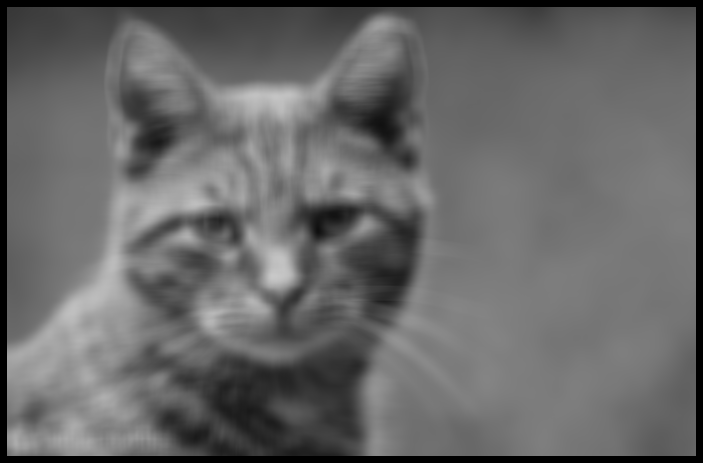

In [20]:
# Assuming gray_image is already defined

# Define the kernel size
M = 15
N = 15

# Create the kernel
kernel = np.ones((M, N), dtype=np.float32) / (M * N)

# Get the dimensions of the image and the kernel
img_height, img_width = gray_image.shape
kernel_height, kernel_width = kernel.shape

# Define the padding size
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Create an empty array to store the result
smoothed_image = np.zeros_like(gray_image, dtype=np.float32)

# Perform convolution
for y in range(pad_height, img_height - pad_height):
    for x in range(pad_width, img_width - pad_width):
        # Apply the kernel to the region of interest
        region = gray_image[y - pad_height:y + pad_height + 1, x - pad_width:x + pad_width + 1]
        conv_result = np.sum(region * kernel)
        smoothed_image[y, x] = conv_result

# Display the smoothed image
smoothed_image = smoothed_image.astype(np.uint8)
cv2_imshow(smoothed_image)

With padding

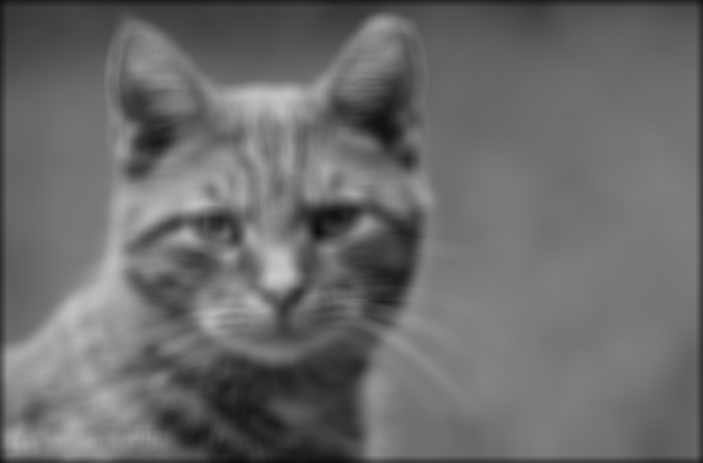

In [21]:
# Assuming gray_image is already defined

# Define the kernel size
M = 15
N = 15

# Create the kernel
kernel = np.ones((M, N), dtype=np.float32) / (M * N)

# Get the dimensions of the image and the kernel
img_height, img_width = gray_image.shape
kernel_height, kernel_width = kernel.shape

# Define the padding size
pad_height = kernel_height // 2
pad_width = kernel_width // 2


# Create an empty array to store the result
smoothed_image = np.zeros_like(gray_image, dtype=np.float32)

# Apply padding to the input image
padded_image = np.pad(gray_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

# Perform convolution with padding
for y in range(pad_height, img_height + pad_height):
    for x in range(pad_width, img_width + pad_width):
        # Apply the kernel to the region of interest
        region = padded_image[y - pad_height:y + pad_height + 1, x - pad_width:x + pad_width + 1]
        conv_result = np.sum(region * kernel)
        smoothed_image[y - pad_height, x - pad_width] = conv_result

# Display the smoothed image
smoothed_image = smoothed_image.astype(np.uint8)
cv2_imshow(smoothed_image)

# Slice an Image

array([[ 56,  56,  55, ...,  69,  71,  73],
       [ 52,  52,  52, ...,  71,  71,  72],
       [ 53,  54,  54, ...,  72,  72,  73],
       ...,
       [ 48,  43,  45, ..., 105, 103, 104],
       [ 70,  70,  76, ..., 103, 103, 103],
       [ 94,  97, 104, ..., 101, 102, 102]], dtype=uint8)
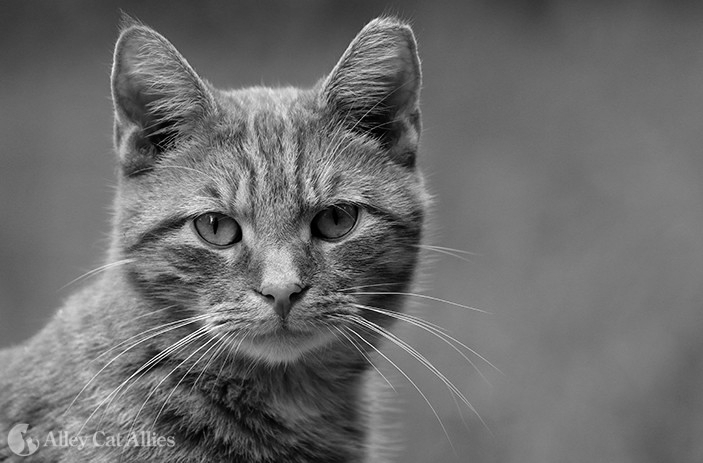

In [ ]:
gray_image

Image width: 703
Image height: 463


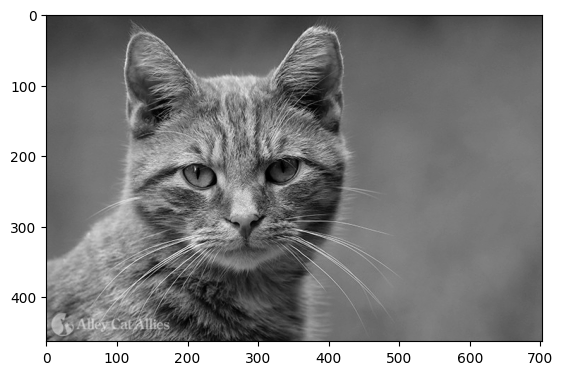

In [ ]:
import matplotlib.pyplot as plt

# Get the dimensions of the image
height, width = gray_image.shape
print("Image width:", width)
print("Image height:", height)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')

We want to slice the left eye from the image

In [ ]:
print(gray_image)

[[ 56  56  55 ...  69  71  73]
 [ 52  52  52 ...  71  71  72]
 [ 53  54  54 ...  72  72  73]
 ...
 [ 48  43  45 ... 105 103 104]
 [ 70  70  76 ... 103 103 103]
 [ 94  97 104 ... 101 102 102]]


array([[229, 210, 182, ..., 110, 146, 149],
       [175, 175, 192, ...,  99, 121, 140],
       [206, 196, 185, ..., 117, 124, 124],
       ...,
       [175, 181, 176, ...,  92,  95,  92],
       [178, 177, 169, ..., 124, 117, 120],
       [179, 189, 187, ..., 130, 151, 110]], dtype=uint8)
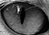

In [ ]:
# Define row and column ranges
row_start, row_end = 210, 245
col_start, col_end = 193, 242

# Extract the specified region from the image
image_region = gray_image[row_start:row_end, col_start:col_end]

image_region

In [ ]:
print(image_region)

[[229 210 182 ... 110 146 149]
 [175 175 192 ...  99 121 140]
 [206 196 185 ... 117 124 124]
 ...
 [175 181 176 ...  92  95  92]
 [178 177 169 ... 124 117 120]
 [179 189 187 ... 130 151 110]]


Example to create a DataFrame from a 2D array using pandas.

In [ ]:
import pandas as pd
import numpy as np

# Create a 2D array
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# Create a DataFrame from the 2D array
df = pd.DataFrame(data, index= [11,12,13], columns=['A', 'B', 'C'])

# Display the DataFrame
print(df)


    A  B  C
11  1  2  3
12  4  5  6
13  7  8  9


In [ ]:
import pandas as pd


# Define row and column ranges
row_start, row_end = 210, 245
col_start, col_end = 193, 242

# Extract the specified region from the image
image_region = gray_image[row_start:row_end, col_start:col_end]

# Get the actual row and column numbers for the DataFrame
row_indices = np.arange(row_start, row_end)
col_indices = np.arange(col_start, col_end)

# Create a DataFrame with the sliced image and apply color-coding
df = pd.DataFrame(image_region, index=row_indices, columns=col_indices)

# Invert the grayscale colormap
styled_df = df.style.set_properties(**{'font-size': '10pt'}).background_gradient(cmap='Greys_r')

# Display the styled DataFrame
styled_df

# Geometric Transformations

We use geometric transformations modify the spatial arrangement of pixels in an image. These transformations are called rubber-sheet transformations because they may be viewed as analogous to “printing” an image on a rubber sheet, then stretching or shrinking the sheet according to a predefined set of rules. Geometric transfor- mations of digital images consist of two basic operations:

1. Spatial transformation of coordinates.
2. Intensity interpolation that assigns intensity values to the spatially transformed
pixels.

In [ ]:
#np.clip example
import numpy as np

# Create an array
arr = np.array([1, 2, 3, 4, 5, 6])

# Clip the values in the array to the range [2, 4]
clipped_arr = np.clip(arr, 2, 4)

# Print the original and clipped arrays
print("Original Array:", arr)
print("Clipped Array:", clipped_arr)


Original Array: [1 2 3 4 5 6]
Clipped Array: [2 2 3 4 4 4]


## Example to illustrate translation

In [24]:
a = np.ones((3,3))
height , width = a.shape
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
b = np.zeros((3,3))
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [26]:
dx = 1
dy = 1
x_index= np.arange(width)
y_index= np.arange(height)
translated_x = np.clip(x_index + dx, 0, width - 1)
translated_y = np.clip(y_index + dy, 0, height - 1)
a[translated_y[:, np.newaxis], translated_x] = b[y_index[:, np.newaxis], x_index]
a

array([[1., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

##Translate

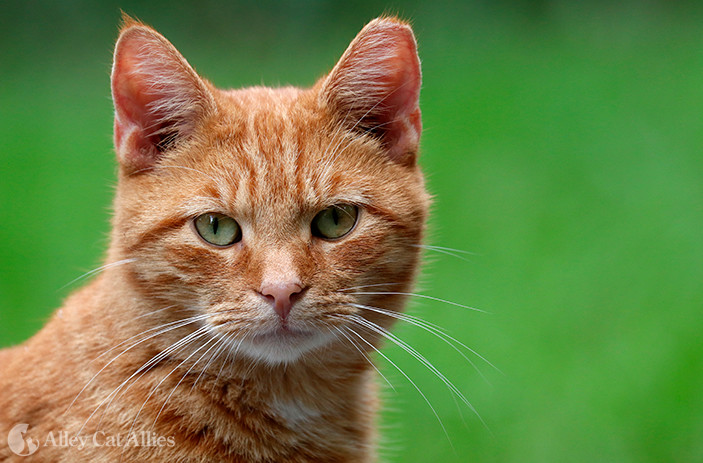

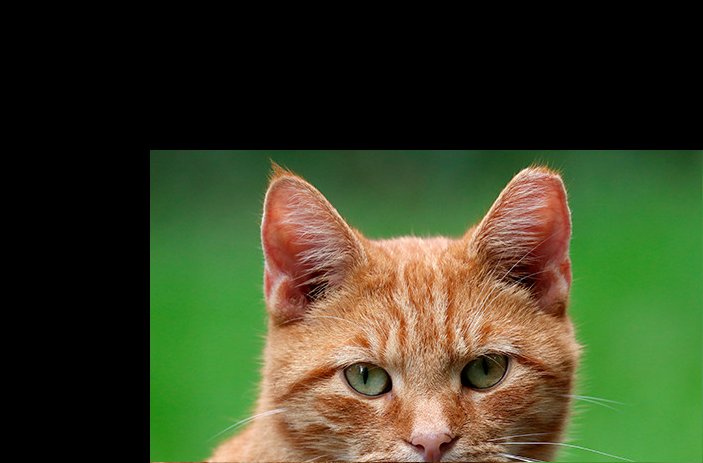

In [27]:
import cv2
import numpy as np

# Define the translation parameters (dx and dy)
dx = 150
dy = 150

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to read image.")
else:
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Define the translated image
    translated_image = np.zeros_like(image)

    x_index= np.arange(width)
    y_index= np.arange(height)

    # Calculate the translated coordinates
    translated_x = np.clip(x_index + dx, 0, width - 1)
    translated_y = np.clip(y_index + dy, 0, height - 1)

    # Copy the pixels from the original image to the translated image
    translated_image[translated_y[:, np.newaxis], translated_x] = image[y_index[:, np.newaxis], x_index]


# Display the original and translated images
cv2_imshow(image)
cv2_imshow(translated_image)


## Scale

Intuition



In [ ]:
import numpy as np

# Original image
original_image = np.array([[10, 20],
                            [30, 40],
                           [50, 60]])

# Upscale factor
upscale_factor = 1.5

# Get dimensions of the original image
original_height, original_width = original_image.shape
print('original_height = ', original_height, 'original_width = ',original_width)

# Calculate dimensions of the scaled image
scaled_height = int(original_height * upscale_factor)
scaled_width = int(original_width * upscale_factor)

print('scaled_height = ', scaled_height, 'scaled_width = ',scaled_width)
# Initialize the scaled image
scaled_image = np.zeros((scaled_height, scaled_width), dtype=np.uint8)

# Perform nearest neighbor interpolation
for y in range(scaled_height):
    for x in range(scaled_width):
        # Compute the corresponding coordinates in the original image
        orig_x = int(x / upscale_factor)
        orig_y = int(y / upscale_factor)

        print('x =', x, 'y =', y)
        print('orig_x =', orig_x, 'orig_y =', orig_y)
        print('======================')
        # Copy the value of the nearest neighbor from the original image
        scaled_image[y, x] = original_image[orig_y, orig_x]



# Display the original and scaled images
print("Original Image:")
print(original_image)
print("\nScaled Image (Nearest Neighbor Interpolation):")
print(scaled_image)


original_height =  3 original_width =  2
scaled_height =  4 scaled_width =  3
x = 0 y = 0
orig_x = 0 orig_y = 0
x = 1 y = 0
orig_x = 0 orig_y = 0
x = 2 y = 0
orig_x = 1 orig_y = 0
x = 0 y = 1
orig_x = 0 orig_y = 0
x = 1 y = 1
orig_x = 0 orig_y = 0
x = 2 y = 1
orig_x = 1 orig_y = 0
x = 0 y = 2
orig_x = 0 orig_y = 1
x = 1 y = 2
orig_x = 0 orig_y = 1
x = 2 y = 2
orig_x = 1 orig_y = 1
x = 0 y = 3
orig_x = 0 orig_y = 2
x = 1 y = 3
orig_x = 0 orig_y = 2
x = 2 y = 3
orig_x = 1 orig_y = 2
Original Image:
[[10 20]
 [30 40]
 [50 60]]

Scaled Image (Nearest Neighbor Interpolation):
[[10 10 20]
 [10 10 20]
 [30 30 40]
 [50 50 60]]


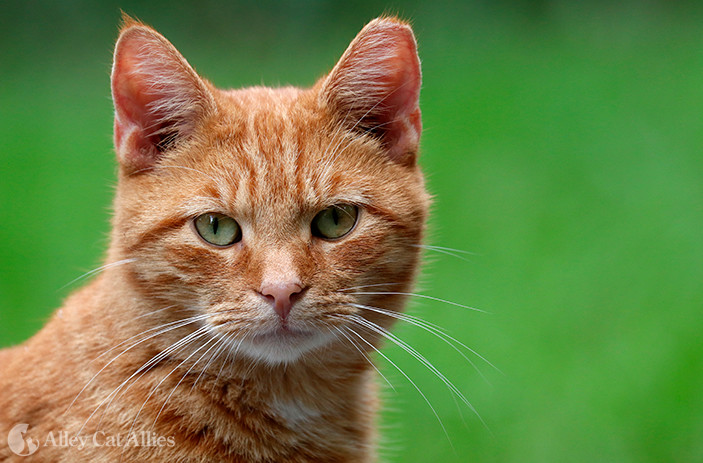

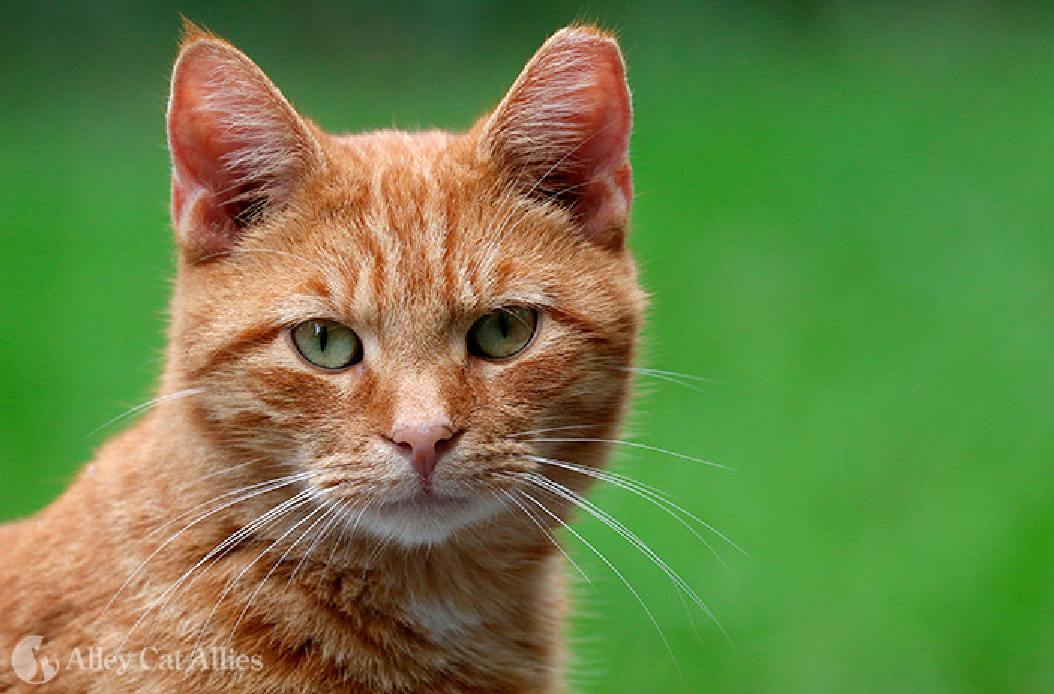

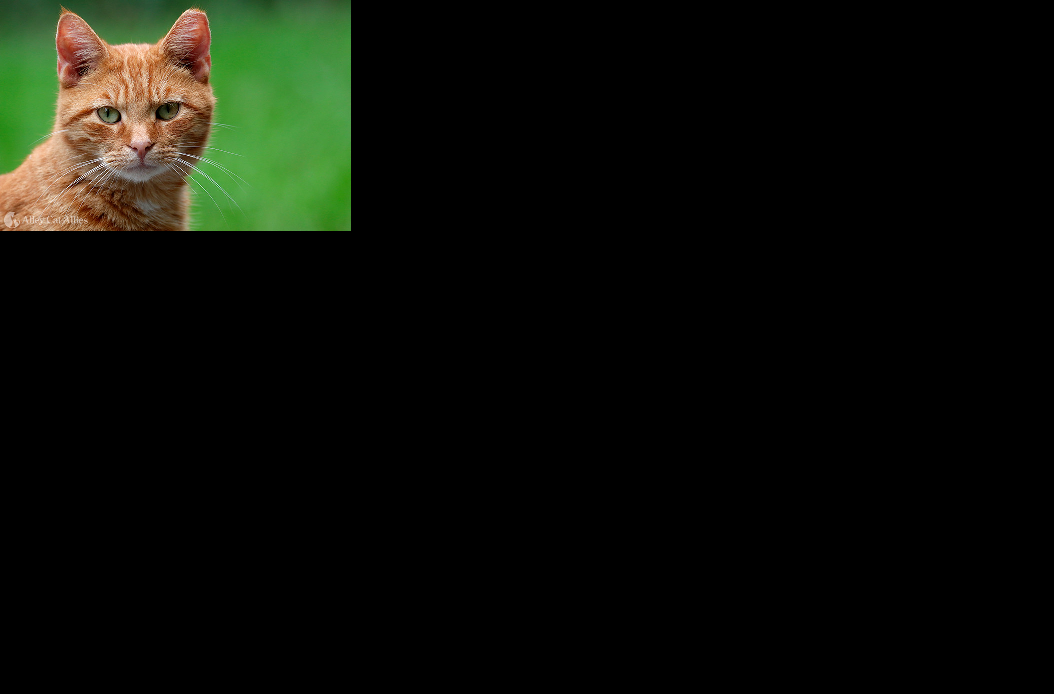

In [ ]:
# Define scaling factors (sx and sy)
sx = 1.5
sy = 1.5

sx1 = 0.5
sy1 = 0.5

# Get the dimensions of the image
height, width, _ = image.shape

# Define the scaled image dimensions
scaled_height = int(height * sy)
scaled_width = int(width * sx)

scaled_height_down = int(height * sy1)
scaled_width_down = int(width * sx1)

# Define the scaled image
scaled_image = np.zeros((scaled_height, scaled_width, 3), dtype=np.uint8)
scaled_image_down = np.zeros((scaled_height, scaled_width, 3), dtype=np.uint8)

# Perform scaling without using cv2.resize()
for y in range(scaled_height):
    for x in range(scaled_width):
        # Compute the corresponding coordinates in the original image
        orig_x = int(x / sx)
        orig_y = int(y / sy)

        # Check if the original coordinates are within the image bounds
        if 0 <= orig_x < width and 0 <= orig_y < height:
            scaled_image[y, x] = image[orig_y, orig_x]

# Perform scaling without using cv2.resize()
for y1 in range(scaled_height_down):
    for x1 in range(scaled_width_down):
        # Compute the corresponding coordinates in the original image
        orig_x = int(x1 / sx1)
        orig_y = int(y1 / sy1)

        # Check if the original coordinates are within the image bounds
        if 0 <= orig_x < width and 0 <= orig_y < height:
            scaled_image_down[y1, x1] = image[orig_y, orig_x]

# Display the original and scaled images
cv2_imshow(image)
cv2_imshow(scaled_image)
cv2_imshow(scaled_image_down)

## Rotate

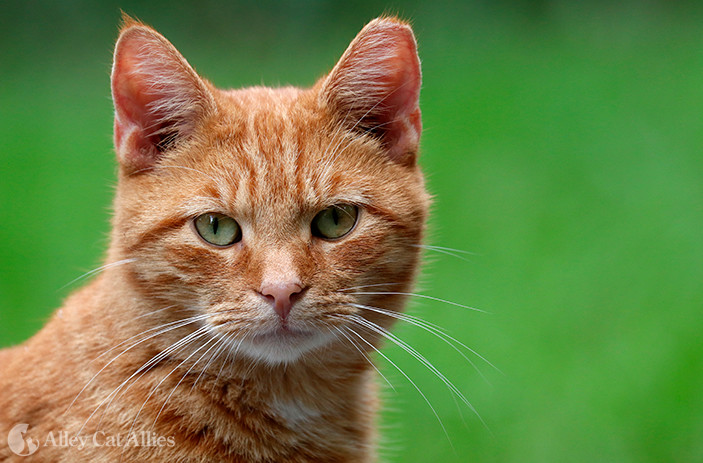

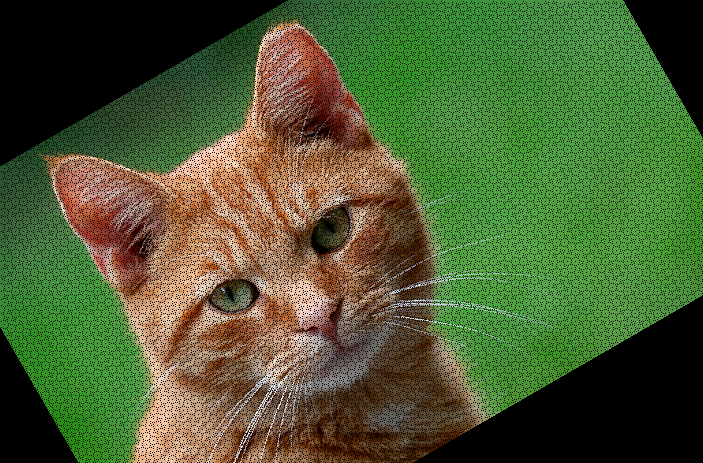

In [ ]:
# Define the rotation angle (in degrees)
angle = -30

# Get the dimensions of the image
height, width, _ = image.shape

# Define the rotation matrix
angle_radians = np.radians(angle)
cos_theta = np.cos(angle_radians)
sin_theta = np.sin(angle_radians)

# Define the center point for rotation
center_x = width / 2
center_y = height / 2

# Define the rotated image
rotated_image = np.zeros_like(image)

# Perform rotation without using cv2.warpAffine
for y in range(height):
    for x in range(width):
        # Translate coordinates to origin
        x_translated = x - center_x
        y_translated = y - center_y

        # Rotate coordinates
        x_rotated = int(x_translated * cos_theta - y_translated * sin_theta + center_x)
        y_rotated = int(x_translated * sin_theta + y_translated * cos_theta + center_y)

        # Check if the rotated coordinates are within the image bounds
        if 0 <= x_rotated < width and 0 <= y_rotated < height:
            rotated_image[y_rotated, x_rotated] = image[y, x]

# Display the original and rotated images
cv2_imshow(image)
cv2_imshow(rotated_image)

## Shear

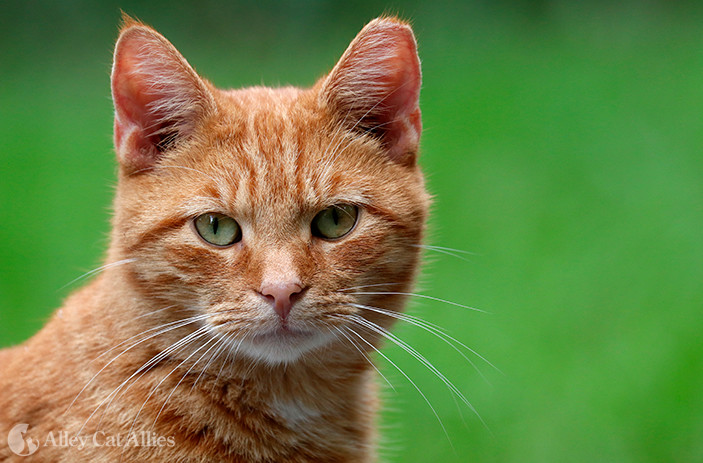

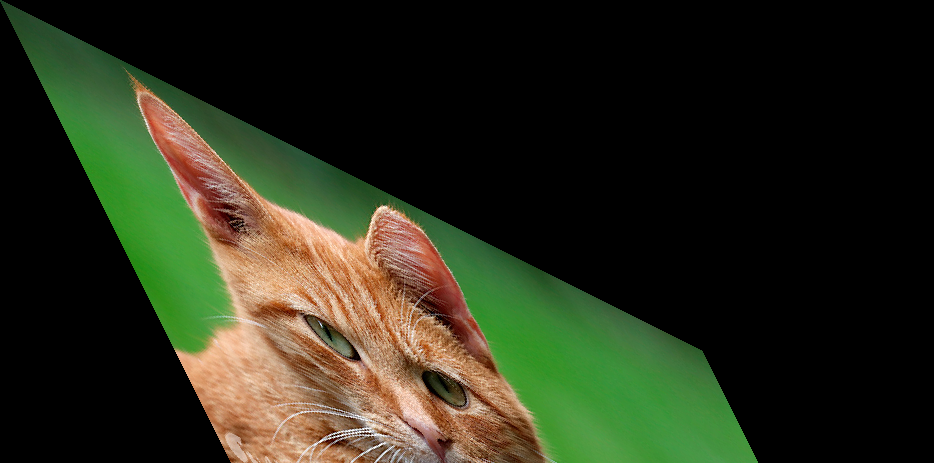

In [ ]:
# Define shear parameters (shx and shy)
shx = 0.5  # Shear factor for x direction
shy = 0.5  # Shear factor for y direction

# Get the dimensions of the image
height, width, _ = image.shape

# Define the sheared image dimensions
sheared_height = height
sheared_width = width + int(shx * height)  # Adjusted width to accommodate sheared pixels

# Define the sheared image
sheared_image = np.zeros((sheared_height, sheared_width, 3), dtype=np.uint8)

# Perform shear without using cv2.warpAffine()
for y in range(height):
    for x in range(width):
        # Compute the sheared coordinates
        sheared_x = x + int(shx * y)
        sheared_y = y + int(shy * x)

        # Check if the sheared coordinates are within the image bounds
        if 0 <= sheared_x < sheared_width and 0 <= sheared_y < sheared_height:
            sheared_image[sheared_y, sheared_x] = image[y, x]

# Display the original and sheared images
cv2_imshow(image)
cv2_imshow(sheared_image)

## Affine


Affine transformations are a class of geometric transformations in Euclidean space that preserve points, straight lines, and planes. These transformations include translation, rotation, scaling, shearing (or skewing), and reflection.

Mathematically, an affine transformation can be represented as a linear transformation followed by a translation. In 2D space, an affine transformation can be expressed using a 2x2 matrix for the linear transformation part and a 2x1 vector for the translation part.

The general form of an affine transformation in 2D space can be represented as:

T(x)=Ax+b

Where:

T(x) is the transformed point.

x is the original point.

A is a 2x2 matrix representing the linear transformation (scaling, rotation, shearing).

b is a 2x1 vector representing the translation.

However, it is possible to use homogeneous coordinates to express all four affine transformations using a single 3 × 3 matrix in the following general form:


In the below example:
* The first row represents the transformation applied to the x-coordinate.
* The second row represents the transformation applied to the y-coordinate.
* The third row is typically [0, 0, 1], representing no transformation in the homogeneous coordinate system.
* You can adjust the values of a, b, c, d, tx, and ty to define different affine transformations, such as scaling, shearing, and translation.

In [32]:
import numpy as np

def general_affine(a, b, c, d, tx, ty):
    """
    Create a general affine transformation matrix.

    Parameters:
        a, b, c, d: Scaling and shearing factors.
        tx, ty: Translation in the x and y directions.

    Returns:
        A 3x3 NumPy array representing the affine transformation matrix.
    """
    return np.array([[a, b, tx],
                     [c, d, ty],
                     [0, 0, 1]])

# Example usage:
a = 1.5  # Scaling factor in x-direction
b = 0.5  # Shearing factor in x-direction
c = 0.5  # Shearing factor in y-direction
d = 1.5  # Scaling factor in y-direction
tx = 10  # Translation in x-direction
ty = 20  # Translation in y-direction

# Create the general affine transformation matrix
affine_matrix = general_affine(a, b, c, d, tx, ty)
print("General affine transformation matrix:")
print(affine_matrix)


General affine transformation matrix:
[[ 1.5  0.5 10. ]
 [ 0.5  1.5 20. ]
 [ 0.   0.   1. ]]


In [ ]:
# Import necessary libraries
import numpy as np

# Define a single affine matrix for scale, rotation, shear, and translation
affine_matrix = np.array([[2, 0, 0],   # Scale by 2 along x-axis
                           [0, 0.5, 0], # Scale by 0.5 along y-axis
                           [1, 1, 1]])  # Shear and translation

# Define a point for demonstration
point = np.array([[1], [1], [1]])

# Apply affine transformations
scaled_point = np.dot(affine_matrix, point)
print("Scaled Point:", scaled_point)

# Define rotation angle (in radians)
theta = np.pi / 4  # 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],  # Rotation by 45 degrees
                             [np.sin(theta), np.cos(theta), 0],
                             [0, 0, 1]])

# Apply rotation
rotated_point = np.dot(rotation_matrix, point)
print("Rotated Point:", rotated_point)

# Define shear matrix
shear_matrix = np.array([[1, 1, 0],  # Shear by 1 along x-axis
                          [0, 1, 0],
                          [0, 0, 1]])

# Apply shear
sheared_point = np.dot(shear_matrix, point)
print("Sheared Point:", sheared_point)

# Define translation vector
translation_vector = np.array([[3], [4], [0]])  # Translate by (3, 4)

# Apply translation
translated_point = point + translation_vector
print("Translated Point:", translated_point)


Scaled Point: [[2. ]
 [0.5]
 [3. ]]
Rotated Point: [[1.11022302e-16]
 [1.41421356e+00]
 [1.00000000e+00]]
Sheared Point: [[2]
 [1]
 [1]]
Translated Point: [[4]
 [5]
 [1]]


In [ ]:
import plotly.graph_objs as go

# Get image dimensions
height, width = gray_image_manual.shape

# Create meshgrid for x and y coordinates
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Flatten the image intensity values
intensity = gray_image_manual.flatten()

# Create 3D plot
fig = go.Figure(data=[go.Surface(z=intensity.reshape(height, width), colorscale='gray', showscale=False)])

# Set plot parameters
fig.update_layout(scene=dict(
                    xaxis=dict(title='X'),
                    yaxis=dict(title='Y'),
                    zaxis=dict(title='Intensity')
                    ))

# Show plot
fig.show()
